In [2]:
import pickle
import pandas as pd
import os
import numpy as np
import torch

In [2]:
result_folder = 'results'
os.makedirs(result_folder, exist_ok=True)

for i in range(1, 16):
    subfolder_name = f'vp{i}'
    os.makedirs(os.path.join(result_folder, subfolder_name), exist_ok=True)

In [3]:
result_folder = 'csv'
os.makedirs(result_folder, exist_ok=True)

In [5]:
import zipfile
with zipfile.ZipFile('/content/results.zip', 'r') as zip_ref:
  zip_ref.extractall('.')

In [7]:
import pickle
import pandas as pd
import os
import numpy as np
import torch


result_folder = 'results'
os.makedirs(result_folder, exist_ok=True)

for i in range(1, 16):
    subfolder_name = f'vp{i}'
    os.makedirs(os.path.join(result_folder, subfolder_name), exist_ok=True)
result_folder = 'csv'
os.makedirs(result_folder, exist_ok=True)

In [6]:
annotations_converter = pickle.load(open("/content/annotation_converter.pkl", "rb"))
annotations_csv_path = "/content/midlevel.chunks_90.csv"
df_annotations = pd.read_csv(annotations_csv_path, delimiter=',')

In [14]:
import shutil
shutil.rmtree('/content/__MACOSX')

Folder 'results' and its contents deleted successfully.


In [7]:
activity_index_map = {activity: index for index, activity in enumerate(annotations_converter)}
df_annotations['activity_index'] = df_annotations['activity'].map(activity_index_map)

In [8]:
acc_dict = {}
for root, _, files in os.walk("/content/results"):
    for file in files:
        folder_name = os.path.basename(root)
        if file == ".DS_Store":
          continue
        file_path = f"/content/results/{folder_name}/{file}"
        tensors = torch.load(file_path)
        filtered_annotations = df_annotations[
            df_annotations["file_id"]
            == f"{folder_name}/{os.path.splitext(file)[0]}"
        ]
        flattened_data = []
        max_frame = filtered_annotations["frame_end"].max()
        tensors_len = len(tensors)
        for _, row in filtered_annotations.iterrows():
            if pd.notna(row["activity_index"]):
                for frame in range(row["frame_start"], row["frame_end"] + 1):
                    if frame < tensors_len:
                        top_3_indices = np.argsort(tensors[frame])[-3:][::-1]
                        flattened_data.append(
                            {
                                "frame": frame,
                                "activity": row["activity"],
                                "activity_index": int(row["activity_index"]),
                                "predicted": annotations_converter[int(np.argmax(tensors[frame]))],
                                "predicted_index": np.argmax(tensors[frame])
                            }
                        )
        flattened_df = pd.DataFrame(flattened_data)
        if(len(flattened_df) == 0):
          continue
        matches = flattened_df['activity_index'] == flattened_df['predicted_index']
        accuracy = matches.sum() / len(flattened_df) * 100
        acc_dict[f"{folder_name}/{os.path.splitext(file)[0]}"] = accuracy
        print(f"Accuracy for '{folder_name}/{os.path.splitext(file)[0]}' is {accuracy:.2f}%")

<ipython-input-8-3a510c972344>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  tensors = torch.load(file_path)


Accuracy for 'vp14/run1_2018-05-30-10-11-09.kinect_color' is 75.01%
Accuracy for 'vp14/run2_2018-05-30-10-42-33.kinect_color' is 71.79%
Accuracy for 'vp15/run2_2018-05-30-13-34-33.kinect_color' is 79.57%
Accuracy for 'vp15/run1_2018-05-30-13-05-35.kinect_color' is 75.14%
Accuracy for 'vp6/run2_2018-05-23-11-05-00.kinect_color' is 86.37%
Accuracy for 'vp6/run1_2018-05-23-10-21-45.kinect_color' is 86.91%
Accuracy for 'vp7/run1_2018-05-23-13-16-52.kinect_color' is 85.01%
Accuracy for 'vp7/run2b_2018-05-23-13-54-07.kinect_color' is 82.19%
Accuracy for 'vp12/run1_2018-05-24-15-44-28.kinect_color' is 84.98%
Accuracy for 'vp12/run2_2018-05-24-16-21-35.kinect_color' is 85.95%
Accuracy for 'vp11/run1_2018-05-24-13-44-01.kinect_color' is 80.81%
Accuracy for 'vp11/run2_2018-05-24-14-35-56.kinect_color' is 69.73%
Accuracy for 'vp3/run2_2018-05-29-16-03-37.kinect_color' is 87.67%
Accuracy for 'vp3/run1b_2018-05-08-08-46-01.kinect_color' is 86.91%
Accuracy for 'vp8/run1d_2018-05-23-14-54-38.kinect_c

<ipython-input-8-3a510c972344>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  tensors = torch.load(file_path)


Accuracy for 'vp2/run1_2018-05-03-14-08-31.kinect_color' is 89.39%
Accuracy for 'vp2/run2_2018-05-24-17-22-26.kinect_color' is 88.12%
Accuracy for 'vp1/run2_2018-05-29-14-33-44.kinect_color' is 89.72%
Accuracy for 'vp1/run1b_2018-05-29-14-02-47.kinect_color' is 83.12%


In [40]:
acc_data = []
for file_id, accuracy in acc_dict.items():
  vp = int(file_id.split('/')[0].split('vp')[1])
  run = int(file_id.split('run')[1][0])
  acc_data.append([vp, run, accuracy])
  print(f"File ID: {vp}-{run}, Accuracy: {accuracy:.2f}%")
acc_data.append([9, 2, 0.0])
sorted_data = sorted(acc_data, key=lambda x: (x[0], x[1]))

File ID: 14-1, Accuracy: 75.01%
File ID: 14-2, Accuracy: 71.79%
File ID: 15-2, Accuracy: 79.57%
File ID: 15-1, Accuracy: 75.14%
File ID: 6-2, Accuracy: 86.37%
File ID: 6-1, Accuracy: 86.91%
File ID: 7-1, Accuracy: 85.01%
File ID: 7-2, Accuracy: 82.19%
File ID: 12-1, Accuracy: 84.98%
File ID: 12-2, Accuracy: 85.95%
File ID: 11-1, Accuracy: 80.81%
File ID: 11-2, Accuracy: 69.73%
File ID: 3-2, Accuracy: 87.67%
File ID: 3-1, Accuracy: 86.91%
File ID: 8-1, Accuracy: 89.70%
File ID: 8-2, Accuracy: 87.13%
File ID: 5-1, Accuracy: 71.61%
File ID: 5-2, Accuracy: 69.18%
File ID: 4-1, Accuracy: 88.54%
File ID: 4-2, Accuracy: 87.92%
File ID: 10-2, Accuracy: 87.39%
File ID: 10-1, Accuracy: 84.96%
File ID: 13-2, Accuracy: 74.25%
File ID: 13-1, Accuracy: 75.62%
File ID: 9-1, Accuracy: 81.06%
File ID: 2-1, Accuracy: 89.39%
File ID: 2-2, Accuracy: 88.12%
File ID: 1-2, Accuracy: 89.72%
File ID: 1-1, Accuracy: 83.12%


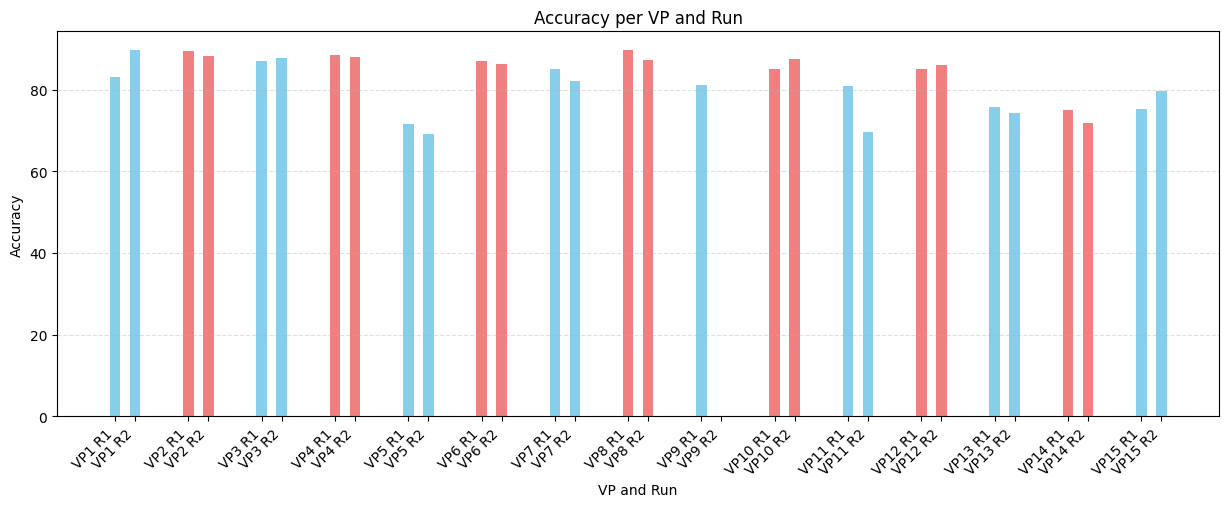

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Extract labels and values
x_labels = [f"VP{x[0]} R{x[1]}" for x in sorted_data]
accuracies = [x[2] for x in sorted_data]

# Create spacing between groups
x = []
spacing = 1.5 # Space between groups
gap = 2.5  # Extra space between different VPs
current_x = 0
previous_vp = None
colors = []
color_map = ['skyblue', 'lightcoral']
 # Define colors for alternating groups

for i, item in enumerate(sorted_data):
    vp = item[0]
    if previous_vp is not None and vp != previous_vp:
        current_x += gap  # Add extra space between different VPs
    x.append(current_x)
    current_x += spacing  # Normal spacing within same VP
    previous_vp = vp
    colors.append(color_map[i // 2 % 2])  # Alternate colors for VP groups

# Create the plot
plt.figure(figsize=(15, 5))
plt.bar(x, accuracies, color=colors, width=0.8)  # Adjust bar width
plt.xticks(x, x_labels, rotation=45, ha="right")
plt.ylabel("Accuracy")
plt.xlabel("VP and Run")
plt.title("Accuracy per VP and Run")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()